In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '14B'

In [3]:
algorithm_name = 'bow'

# Target Classification

### Target Classification Training

In [4]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_training'
)

In [5]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing_trump'
)

In [6]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

In [7]:
corpus = [
    *target_training_dataset.X, 
    *target_testing_dataset.X
]

In [8]:
X = vectorizer.fit_transform(corpus)

In [9]:
svm_target_classification = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [10]:
svm_target_classification.fit(
    X[:len(target_training_dataset.X)],
    target_training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Target Classification Prediction

In [11]:
target_predictions = svm_target_classification.predict(X[len(target_training_dataset.X):])

In [12]:
predicted_tweets_and_ids_objectification_of_women = []
predicted_tweets_and_ids_gender_equality = []
predicted_tweets_and_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [13]:
for label, tweet, id in list(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_tweets_and_ids_objectification_of_women.append((tweet, id))
    elif label == 1:
        predicted_tweets_and_ids_gender_equality.append((tweet, id))
    elif label == 2:
        predicted_tweets_and_ids_conservatism.append((tweet, id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

### Stance Classification Training - Objectification of Women

In [14]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [15]:
predicted_tweets_objectification_of_women = [
    tweet for tweet, _ in predicted_tweets_and_ids_objectification_of_women
]

In [16]:
corpus_objectification_of_women = [
    *stance_training_dataset_objectification_of_women.X,
    *predicted_tweets_objectification_of_women
]

In [17]:
X = vectorizer.fit_transform(corpus_objectification_of_women)

In [18]:
svm_objectification_of_women = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [19]:
svm_objectification_of_women.fit(
    X[:len(stance_training_dataset_objectification_of_women.X)],
    stance_training_dataset_objectification_of_women.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Objectification of Women

In [20]:
predictions_objectification_of_women = svm_objectification_of_women.predict(
    X[len(stance_training_dataset_objectification_of_women.X):]
)

In [21]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_tweets_and_ids_objectification_of_women
        ]
    )
)

In [22]:
stances_objectification_of_women = {}

In [23]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [24]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

### Stance Classification Training - Gender Equality

In [25]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Gender Equality'
)

In [26]:
predicted_tweets_gender_equality = [
    tweet for tweet, _ in predicted_tweets_and_ids_gender_equality
]

In [27]:
corpus_gender_equality = [
    *stance_training_dataset_gender_equality.X,
    *predicted_tweets_gender_equality
]

In [28]:
X = vectorizer.fit_transform(corpus_gender_equality)

In [29]:
svm_gender_equality = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [30]:
svm_gender_equality.fit(
    X[:len(stance_training_dataset_gender_equality.X)],
    stance_training_dataset_gender_equality.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Gender Equality

In [31]:
predictions_gender_equality = svm_gender_equality.predict(
    X[len(stance_training_dataset_gender_equality.X):]
)

In [32]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_tweets_and_ids_gender_equality
        ]
    )
)

In [33]:
stances_gender_equality = {}

In [34]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [35]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

### Stance Classification Training - Conservatism

In [36]:
stance_training_dataset_conservatism = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Conservatism'
)

In [37]:
predicted_tweets_conservatism = [
    tweet for tweet, _ in predicted_tweets_and_ids_conservatism
]

In [38]:
corpus_conservatism = [
    *stance_training_dataset_conservatism.X,
    *predicted_tweets_conservatism
]

In [39]:
X = vectorizer.fit_transform(corpus_conservatism)

In [40]:
svm_conservatism = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [41]:
svm_conservatism.fit(
    X[:len(stance_training_dataset_conservatism.X)],
    stance_training_dataset_conservatism.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Conservatism

In [42]:
predictions_conservatism = svm_conservatism.predict(
    X[len(stance_training_dataset_conservatism.X):]
)

In [43]:
predictions_and_ids_conservatism = list(
    zip(
        predictions_conservatism,
        [
            idx for _, idx in predicted_tweets_and_ids_conservatism
        ]
    )
)

In [44]:
stances_conservatism = {}

In [45]:
sorted_predictions_and_ids_conservatism = sorted(
    predictions_and_ids_conservatism,
    key=operator.itemgetter(1)
)

In [46]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_conservatism, operator.itemgetter(1)):
    stances_conservatism[user_id] = np.mean([stance for stance, _ in list(g)])

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [47]:
metoo_vector = np.array([[0, 2, 0]])

In [48]:
profile_vectors = {
    user_id: {
        'Objectification of Women': stances_objectification_of_women[user_id],
        'Gender Equality':  stances_gender_equality[user_id],
        'Conservatism': stances_conservatism[user_id]
    }
    
    for user_id in set(target_testing_dataset.id)
}

In [49]:
df_algorithm = (pd
      .DataFrame
      .from_dict(profile_vectors, orient='index')
      .applymap(lambda x: x - 1))

df_algorithm = df_algorithm[['Objectification of Women', 'Gender Equality', 'Conservatism']]

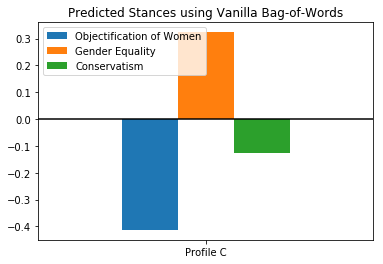

In [50]:
df_algorithm.plot(kind='bar', title=f'Predicted Stances using Vanilla Bag-of-Words', legend=True, rot=45)
plt.axhline(0, color='k')
labels=list('Profile C')
plt.xticks(np.arange(1), ['Profile C'], rotation=0)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_predicted.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [51]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_predicted.tex', 'w', encoding='utf-8') as f:
    df_algorithm.to_latex(f)

In [52]:
obj_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing_trump',
    target='Objectification of Women'
)

In [53]:
gen_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing_trump',
    target='Gender Equality'
)

In [54]:
con_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing_trump',
    target='Conservatism'
)

In [55]:
obj_df = pd.DataFrame(
    [
        obj_stance_testing_dataset.id,
        obj_stance_testing_dataset.y
    ],
).transpose()

obj_df['target'] = 'Objectification of Women'

In [56]:
gen_df = pd.DataFrame(
    [
        gen_stance_testing_dataset.id,
        gen_stance_testing_dataset.y
    ],
    
).transpose()

gen_df['target'] = 'Gender Equality'

In [57]:
con_df = pd.DataFrame(
    [
        con_stance_testing_dataset.id,
        con_stance_testing_dataset.y
    ]
).transpose()

con_df['target'] = 'Conservatism'

In [58]:
df = pd.concat([obj_df, gen_df, con_df])

In [59]:
df['stance'] = df['stance'].apply(lambda x: x - 1)

In [60]:
new_df = df.groupby(['user_id', 'target']).mean().unstack()['stance']

In [61]:
new_df = new_df[['Objectification of Women', 'Gender Equality', 'Conservatism']]

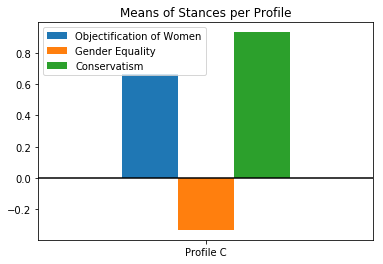

In [62]:
new_df.plot(kind='bar', title='Means of Stances per Profile', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xlabel('')
plt.xticks(np.arange(1), ['Profile C'])
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_means.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [63]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_means.tex', 'w', encoding='utf-8') as f:
    new_df.to_latex(f)

In [64]:
metoo_vector = np.array([-1, 1, -1]).reshape(1, -1)

In [65]:
comparison_df = pd.DataFrame.from_dict(
    {
        'Profile Classification': {
            'Cosine Similarity': cosine_similarity(metoo_vector, df_algorithm.loc[25073877].values.reshape(1, -1))
        },
        'Means of Stances': {
            'Cosine Similarity': cosine_similarity(metoo_vector, new_df.loc[25073877].values.reshape(1, -1))
        }
    }
).transpose()

In [66]:
comparison_df.loc['Profile Classification']

Cosine Similarity    [[0.9244135625642551]]
Name: Profile Classification, dtype: object

In [67]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_similarity.tex', 'w', encoding='utf-8') as f:
    comparison_df.to_latex(f)